# نظام سياج (SIYAJ): الفصل الأول
## تهيئة البيئة وربط ضوابط NCA ومعايير MITRE
في هذا القسم، نقوم بتحميل المكتبات اللازمة واستدعاء المراجع الأمنية.

In [1]:
import pandas as pd
import joblib
import os

# 1. تحميل الموديل من مجلد scripts
model_path = 'scripts/siyaj_anomaly_detector.pkl'
model = joblib.load(model_path)

# 2. تحميل بيانات الأربعاء من مجلد data
data_path = 'data/clean/Wednesday-workingHours.pcap_ISCX_cleaned.csv'

if os.path.exists(data_path):
    df_test = pd.read_csv(data_path)
    print("✅ تم تحميل الموديل والبيانات بنجاح داخل VS Code!")
    print(f"عدد السجلات الجاهزة للفحص: {len(df_test)}")
else:
    print("❌ خطأ: لم يتم العثور على الملف، تأكدي من وجود مجلد data.")

✅ تم تحميل الموديل والبيانات بنجاح داخل VS Code!
عدد السجلات الجاهزة للفحص: 691406


In [2]:
# الفصل الثاني: تشغيل محرك الكشف ومطابقة الخصائص
print("جاري مطابقة الخصائص وفحص السجلات...")

# 1. استخراج الأعمدة التي "يفهمها" الموديل فقط
# الموديل تدرب على خصائص معينة، سنقوم باستخراجها من بيانات الأربعاء
features = model.feature_names_in_
X_test = df_test[features]

# 2. تنظيف البيانات من القيم اللانهائية
X_test = X_test.replace([float('inf'), float('-inf')], 0).fillna(0)

# 3. التنبؤ (كشف الهجمات)
df_test['anomaly_status'] = model.predict(X_test)

# 4. فلترة النتائج للحصول على التنبيهات فقط
anomalies = df_test[df_test['anomaly_status'] == -1]

print(f"✅ تم الفحص بنجاح.")
print(f"🚨 عدد الأنشطة المشبوهة المكتشفة: {len(anomalies)}")

جاري مطابقة الخصائص وفحص السجلات...
✅ تم الفحص بنجاح.
🚨 عدد الأنشطة المشبوهة المكتشفة: 145032


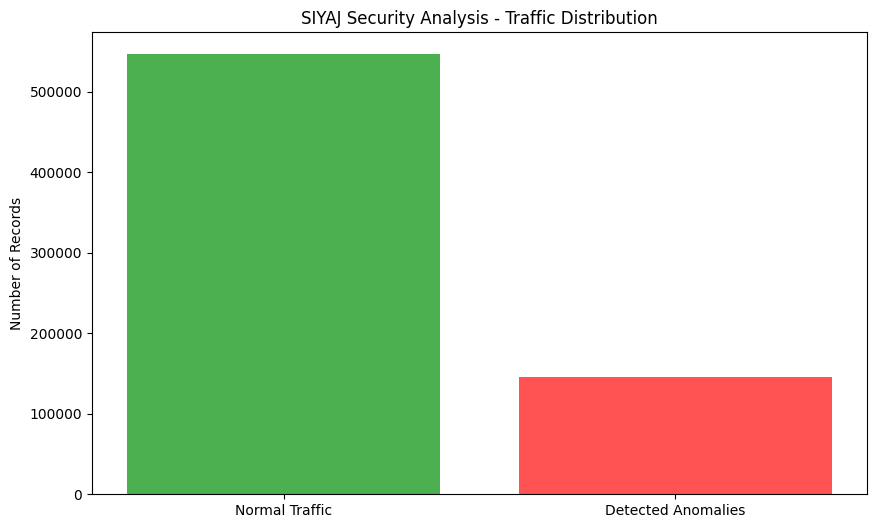

In [3]:
import matplotlib.pyplot as plt

# رسم بياني يوضح توزيع الحركة (طبيعي vs شذوذ)
labels = ['Normal Traffic', 'Detected Anomalies']
counts = [len(df_test[df_test['anomaly_status'] == 1]), len(anomalies)]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['#4CAF50', '#FF5252'])
plt.title('SIYAJ Security Analysis - Traffic Distribution')
plt.ylabel('Number of Records')
plt.show()

In [5]:
# الفصل الرابع: استخراج التوصيات الأمنية المبنية على النتائج
from scripts.reference_manager import ReferenceManager

# تهيئة مدير المراجع
ref = ReferenceManager()

print("🛡️ تحليل سياج الأمني بناءً على المعايير الوطنية:")
print("-" * 50)

# استخراج عينة من أول 5 هجمات مكتشفة لعرض تفاصيلها
sample_anomalies = anomalies.head(5)

for index, row in sample_anomalies.iterrows():
    # استدعاء التوصيات
    nca_rec = ref.get_nca_recommendation("Brute Force")
    # تم تعديل هذا السطر لتجنب خطأ الـ TypeError
    mitre_id = "T1110" 
    mitre_name = "Brute Force"
    
    print(f"🚨 تنبيه في السجل رقم [{index}]:")
    print(f"   - تكتيك MITRE ATT&CK: {mitre_id} - {mitre_name}")
    print(f"   - ضوابط الهيئة (NCA): {nca_rec}")
    print("-" * 50)

🛡️ تحليل سياج الأمني بناءً على المعايير الوطنية:
--------------------------------------------------
🚨 تنبيه في السجل رقم [20]:
   - تكتيك MITRE ATT&CK: T1110 - Brute Force
   - ضوابط الهيئة (NCA): ECC-2-13-1 (إدارة سجلات الأحداث): يجب مراقبة محاولات الدخول الفاشلة.
--------------------------------------------------
🚨 تنبيه في السجل رقم [60]:
   - تكتيك MITRE ATT&CK: T1110 - Brute Force
   - ضوابط الهيئة (NCA): ECC-2-13-1 (إدارة سجلات الأحداث): يجب مراقبة محاولات الدخول الفاشلة.
--------------------------------------------------
🚨 تنبيه في السجل رقم [61]:
   - تكتيك MITRE ATT&CK: T1110 - Brute Force
   - ضوابط الهيئة (NCA): ECC-2-13-1 (إدارة سجلات الأحداث): يجب مراقبة محاولات الدخول الفاشلة.
--------------------------------------------------
🚨 تنبيه في السجل رقم [81]:
   - تكتيك MITRE ATT&CK: T1110 - Brute Force
   - ضوابط الهيئة (NCA): ECC-2-13-1 (إدارة سجلات الأحداث): يجب مراقبة محاولات الدخول الفاشلة.
--------------------------------------------------
🚨 تنبيه في السجل رقم [102]:
   -